In [ ]:
graph = {
 'A': set(['B', 'C']),
    'B': set(['A', 'D', 'E']),
    'C': set(['A', 'F']),
    'D': set(['B']),
    'E': set(['B', 'F']),
    'F': set(['C', 'E'])
}

visited = []
queue = []

def bfs(visited, graph, node):
  visited.append(node)
  queue.append(node)

  while queue:
    m = queue.pop(0)
    print (m, end = " ")

    for neighbour in graph[m]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)

print("Following is the Breadth-First Search")
bfs(visited, graph, 'A')

Following is the Breadth-First Search
A B C E D F 

In [ ]:
from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([start])
    while queue:
        vertex = queue.popleft()
        if vertex not in visited:
            visited.add(vertex)
            print(vertex)
            queue.extend(graph[vertex] - visited)

graph = {
    'A': set(['B', 'C']),
    'B': set(['A', 'D', 'E']),
    'C': set(['A', 'F']),
    'D': set(['B']),
    'E': set(['B', 'F']),
    'F': set(['C', 'E'])
}
print(bfs(graph, 'A'))

A
B
C
E
D
F
None


In [ ]:
graph = {
  '5' : ['3','7'],
  '3' : ['2', '4'],
  '7' : ['8'],
  '2' : [],
  '4' : ['8'],
  '8' : []
}

visited = set()

def dfs(visited, graph, node):
    if node not in visited:
        print (node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)

print("Following is the Depth-First Search")
dfs(visited, graph, '5')

Following is the Depth-First Search
5
3
2
4
8
7


Path found: ['A', 'F', 'G', 'I', 'J']


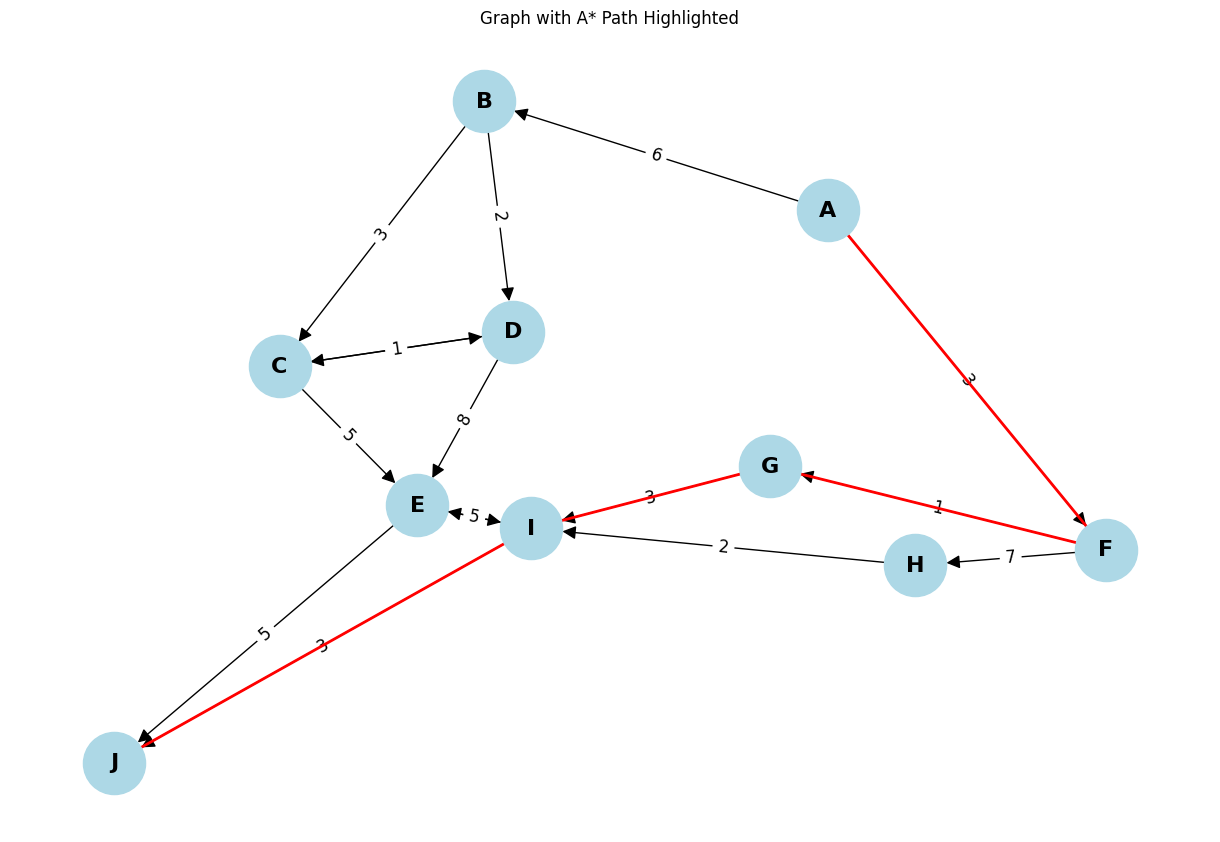

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

Graph_nodes = {
    'A': [('B', 6), ('F', 3)],
    'B': [('C', 3), ('D', 2)],
    'C': [('D', 1), ('E', 5)],
    'D': [('C', 1), ('E', 8)],
    'E': [('I', 5), ('J', 5)],
    'F': [('G', 1), ('H', 7)],
    'G': [('I', 3)],
    'H': [('I', 2)],
    'I': [('E', 5), ('J', 3)],
}

def h(n):
    H_dist = {
        'A': 10,
        'B': 8,
        'C': 5,
        'D': 7,
        'E': 3,
        'F': 6,
        'G': 5,
        'H': 3,
        'I': 1,
        'J': 0
    }
    return H_dist[n]

def get_neighbors(v):
    return Graph_nodes.get(v, [])

def aStarAlgo(start_node, stop_node):
    open_set = set([start_node])
    closed_set = set()
    g = {}
    parents = {}
    g[start_node] = 0
    parents[start_node] = start_node

    while open_set:
        n = None
        for v in open_set:
            if n is None or g[v] + h(v) < g[n] + h(n):
                n = v

        if n == stop_node:
            path = []
            while parents[n] != n:
                path.append(n)
                n = parents[n]
            path.append(start_node)
            path.reverse()

            print('Path found: {}'.format(path))
            return path

        if not Graph_nodes.get(n):
            continue

        for (m, weight) in get_neighbors(n):
            if m not in open_set and m not in closed_set:
                open_set.add(m)
                parents[m] = n
                g[m] = g[n] + weight
            else:
                if g[m] > g[n] + weight:
                    g[m] = g[n] + weight
                    parents[m] = n
                    if m in closed_set:
                        closed_set.remove(m)
                        open_set.add(m)

        if n is None:
            print('Path does not exist!')
            return None

        open_set.remove(n)
        closed_set.add(n)

    print('Path does not exist!')
    return None

path = aStarAlgo('A', 'J')

def draw_graph():
    G = nx.DiGraph()

    for node, edges in Graph_nodes.items():
        for neighbor, weight in edges:
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G, seed=42)

    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue',
            font_size=16, font_weight='bold', arrows=True, arrowsize=20)

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red',
                               width=2)

    plt.title('Graph with A* Path Highlighted')
    plt.show()

draw_graph()


In [ ]:
from collections import deque

def bfs(graph, start, goal):
    visited = set()
    queue = deque([[start]])

    if start == goal:
        return [start]

    while queue:
        path = queue.popleft()
        node = path[-1]

        if node not in visited:
            neighbors = graph[node]
            for neighbor in neighbors:
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)

                if neighbor == goal:
                    return new_path

            visited.add(node)

    return None

graph_bfs = {
    'S': ['A', 'B', 'C'],
    'A': ['S', 'D', 'E'],
    'B': ['S', 'F'],
    'C': ['S', 'G', 'H'],
    'D': ['A'],
    'E': ['A'],
    'F': ['B'],
    'G': ['C'],
    'H': ['C']
}

print("BFS path:", bfs(graph_bfs, 'S', 'G'))


BFS path: ['S', 'C', 'G']


In [ ]:
from queue import PriorityQueue

def a_star(graph, start, goal, h):
    open_set = PriorityQueue()
    open_set.put((0, start))
    came_from = {}
    g_score = {node: float('inf') for node in graph}
    g_score[start] = 0

    while not open_set.empty():
        _, current = open_set.get()

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        for neighbor, cost in graph[current].items():
            tentative_g_score = g_score[current] + cost

            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score = tentative_g_score + h[neighbor]
                open_set.put((f_score, neighbor))

    return None

graph_a_star = {
    'A': {'B': 2, 'C': 3},
    'B': {'A': 2, 'D': 4, 'E': 7},
    'C': {'A': 3, 'F': 1},
    'D': {'B': 4},
    'E': {'B': 7, 'F': 2, 'G': 3},
    'F': {'C': 1, 'E': 2},
    'G': {'E': 3}
}
heuristics_a_star = {
    'A': 10,
    'B': 8,
    'C': 5,
    'D': 7,
    'E': 3,
    'F': 2,
    'G': 0
}

print("A* path:", a_star(graph_a_star, 'A', 'G', heuristics_a_star))


A* path: ['A', 'C', 'F', 'E', 'G']


In [ ]:
def minimax(depth, node_index, maximizing_player, values, alpha, beta):
    if depth == 3:
        return values[node_index]

    if maximizing_player:
        best = float('-inf')
        for i in range(2):
            val = minimax(depth + 1, node_index * 2 + i, False, values, alpha,
                          beta)
            best = max(best, val)
            alpha = max(alpha, best)

            if beta <= alpha:
                break
        return best
    else:
        best = float('inf')
        for i in range(2):
            val = minimax(depth + 1, node_index * 2 + i, True, values, alpha,
                          beta)
            best = min(best, val)
            beta = min(beta, best)

            if beta <= alpha:
                break
        return best

values_minimax = [15, 25, 10, 5, 18, 20, 3, 12]
print("Optimal value:", minimax(0, 0, True, values_minimax, float('-inf'),
                                float('inf')))


Optimal value: 12


In [ ]:
import networkx as nx

def bidirectional_search(G, start, goal):
    forward = {start: None}
    backward = {goal: None}

    while forward and backward:
        if set(forward.keys()) & set(backward.keys()):
            return True

        forward = {v: u for u in forward for v in G[u] if v not in forward}
        backward = {v: u for u in backward for v in G[u] if v not in backward}

    return False

'''G = nx.Graph()
G.add_edges_from([(1,2), (2,3), (3,4), (4,5)])
print(bidirectional_search(G, 1, 5))'''

G = nx.Graph()
G.add_edges_from([
    (1, 2), (2, 3), (3, 4), (4, 5),
    (1, 6), (6, 7), (7, 8), (8, 9),
    (5, 9), (3, 7)
])
print(bidirectional_search(G, 1, 9))

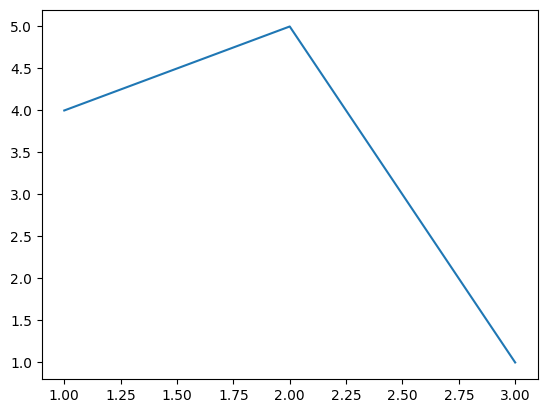

In [ ]:
#basic plot

from matplotlib import pyplot as plt

 #Plotting to our canvas

plt.plot([1,2,3],[4,5,1])

 #Showing what we plotted

plt.show()


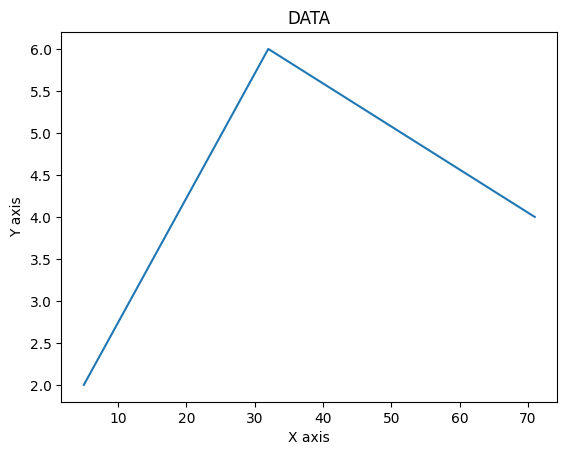

In [ ]:
#PLOT WITH A TITLE

x = [5,32,71]
y = [2,6,4]
plt.plot(x,y)
plt.title('DATA')
plt.ylabel('Y axis')
plt.xlabel('X axis')
plt.show()

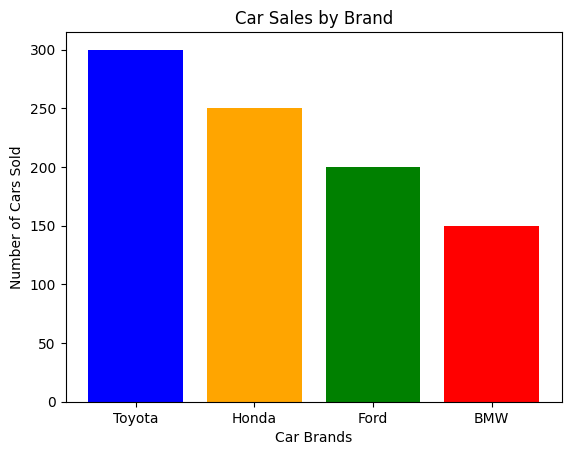

In [ ]:
#BAR GRAPH

import matplotlib.pyplot as plt

car_brands = ['Toyota', 'Honda', 'Ford', 'BMW']
sales = [300, 250, 200, 150]

plt.bar(car_brands, sales, color=['blue', 'orange', 'green', 'red'])

plt.xlabel('Car Brands')
plt.ylabel('Number of Cars Sold')
plt.title('Car Sales by Brand')

plt.show()


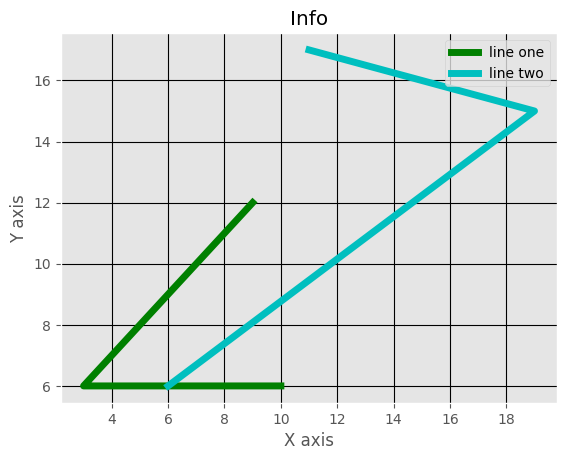

In [ ]:
#Plot with style

from matplotlib import pyplot as plt
from matplotlib import style

style.use('ggplot')
x = [9,3,10]
y = [12,6,6]
x2 = [6,19,11]
y2 = [6,15,17]
plt.plot(x,y,'g',label='line one', linewidth=5)
plt.plot(x2,y2,'c',label='line two',linewidth=5)
plt.title('Info')
plt.ylabel('Y axis')
plt.xlabel('X axis')
plt.legend()
plt.grid(True,color='k')
plt.show()

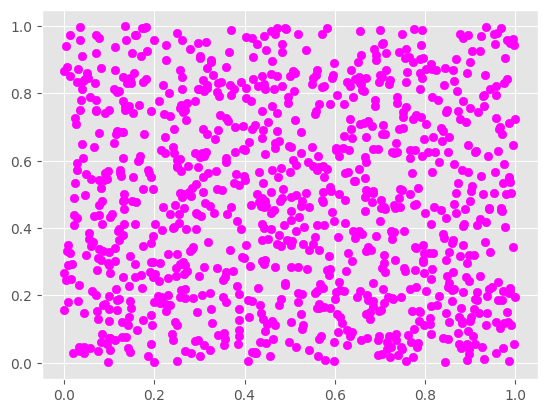

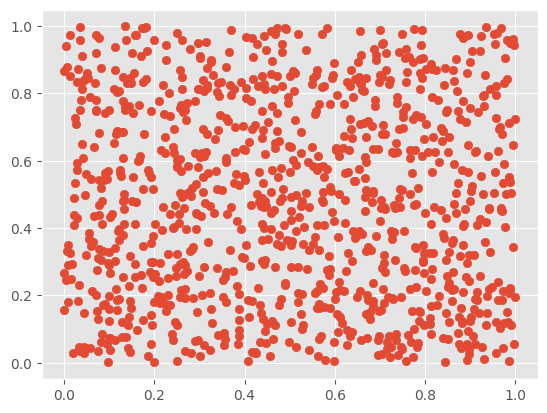

In [ ]:
import numpy as np
x = np.random.random(1000)
y = np.random.random(1000)
plt.scatter(x,y,color='magenta')
plt.show()
plt.scatter(x, y)

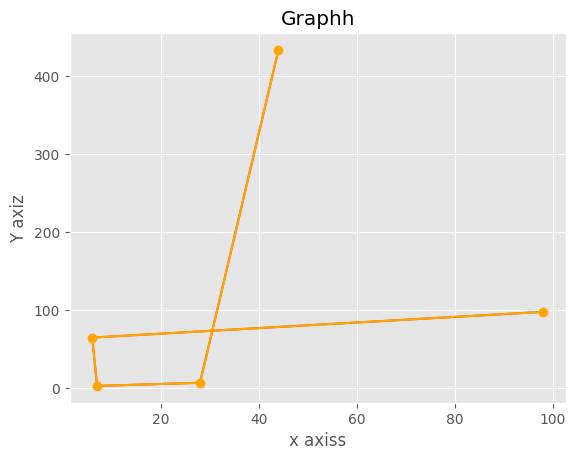

In [ ]:
x= [98,6,7,28,44]
y= [98,65,3,7,434]

plt.plot(x,y)

plt.title('Graphh')
plt.ylabel('Y axiz')
plt.xlabel('x axiss')
plt.plot(x, y, '-o', color = 'orange')

plt.show()

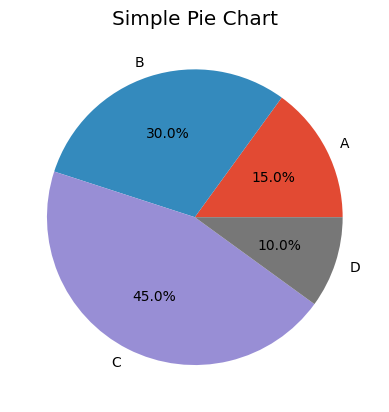

In [ ]:
#PIE CHART

import matplotlib.pyplot as plt

labels = ['A', 'B', 'C', 'D']
sizes = [15, 30, 45, 10]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title('Simple Pie Chart')

plt.show()


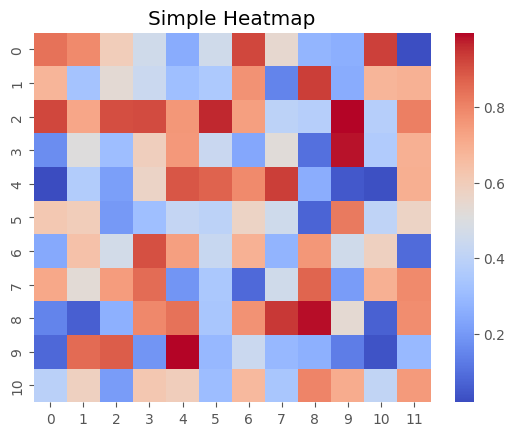

In [ ]:
#HEAT MAP

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = np.random.rand(11, 12)

sns.heatmap(data, cmap='coolwarm')

plt.title('Simple Heatmap')
plt.show()



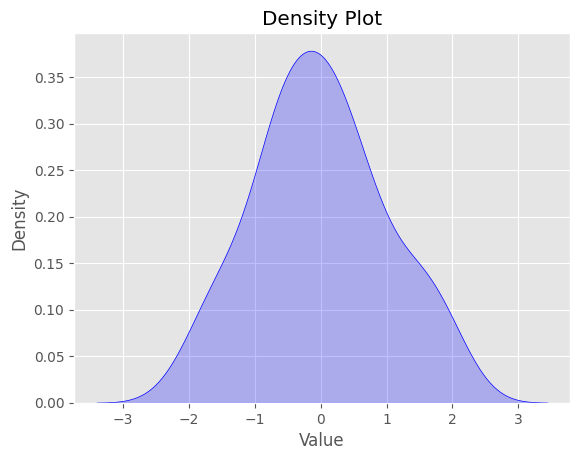

In [ ]:
#DENSITY PLOT

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = np.random.normal(loc=0, scale=1, size=100)

sns.kdeplot(data, fill=True, color='blue')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Plot')

plt.show()


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Missing values in each column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


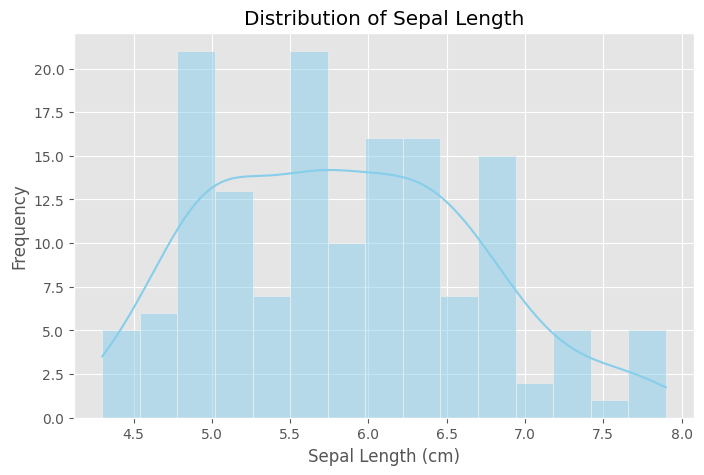

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = sns.load_dataset('iris')

print(data.head())

print("\nMissing values in each column:")
print(data.isnull().sum())

plt.figure(figsize=(8, 5))
sns.histplot(data['sepal_length'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()
